# Y-DATA PS4DS Homework 5 - Programming
#### Version 2
#### November 28, 2024

In [1]:
import random
import numpy as np
from scipy.stats import t, norm
import matplotlib.pyplot as plt

In [2]:
# Set the seed for reproducibility!
random.seed(42)
np.random.seed(42)

## Question 1

In this assignment, you will evaluate the power of the following test:

Assume that $X_1,...,X_n$ are sampled i.i.d from $N(\mu, \sigma^2)$ where both parameters are unknown and consider the hypotheses $H_0:\mu = 0$ vs. $H_1:\mu >0$.

In this case, we reject the null if $\frac{\bar{X}_n}{S_n/\sqrt{n}}>t_{n-1, 1-\alpha}$ where $S_n^2=\frac{1}{n-1}\sum_{i=1}^{n}(X_i-\bar{X}_n)^2$ and $t_{n-1, 1-\alpha}$ is the $1-\alpha$ quantile of t distribution with $n-1$ degrees of freedom.

1. Write a function that takes as input $n$, $\mu$, $\sigma$ and $\alpha$, draws a random sample $X_1,...,X_n\sim N(\mu, \sigma^2)$, computes the test statistic and returns whether the null is rejected or not.
2. Write a function that takes as input $n$, $\mu$, $\sigma$, $\alpha$, and $N$ (the number of repetitions), runs the above $N$ times and returns the proportion of rejections.
3. Compute the proportion of rejections for $n=12$, $\sigma^2=1$, $\alpha=0.05$, $\mu=1$, and $N=10000$.
4. Repeat the computation for different (positive) values of $\mu$ and plot the resulting curve. Explain your results.
5. Fix again $\mu = 1$ and repeat the computation for different values of $\sigma^2$. Plot the resulting curve and explain your results.
6. Fix again $\sigma^2 = 1$ and repeat the computation for different values of $\alpha$. Plot the resulting curve and explain your results.
7. How would the above curves change if you had used a Z-test instead? Repeat the three plots above, adding the relevant curves for the Z-test on each plot.


In [3]:
# Your code here
import numpy as np
from scipy import stats

def t_test(n, mu, sigma, alpha):
    sample = np.random.normal(mu, sigma, size=n)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    t_stat = sample_mean / (sample_std / np.sqrt(n))
    df = n - 1
    t_critical = stats.t.ppf(1 - alpha, df)
    return t_stat > t_critical

In [4]:
def power_simulation(n, mu, sigma, alpha, N):
    rejections = 0
    for _ in range(N):
        if t_test(n, mu, sigma, alpha):
            rejections += 1
    return rejections / N

In [5]:
n = 12
mu = 1
sigma = 1
alpha = 0.05
N = 10000

In [6]:
power_simulation(n, mu, sigma, alpha, N)

0.9446

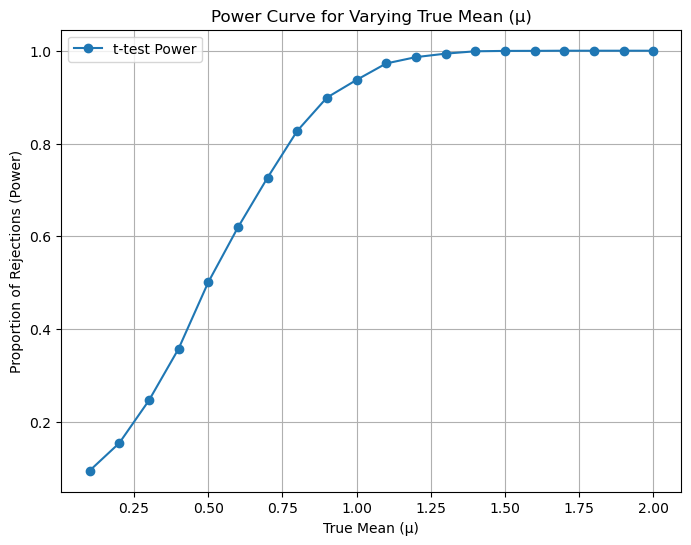

In [7]:
mu_values = np.linspace(0.1, 2, 20)
power_values = [power_simulation(n, mu, sigma, alpha, N) for mu in mu_values]
plt.figure(figsize=(8, 6))
plt.plot(mu_values, power_values, marker='o', label="t-test Power")
plt.xlabel("True Mean (μ)")
plt.ylabel("Proportion of Rejections (Power)")
plt.title("Power Curve for Varying True Mean (μ)")
plt.grid(True)
plt.legend()
plt.show()

As mu increases, the power of the test increases. This is because a larger effect size makes it easier to reject the null hypothesis.

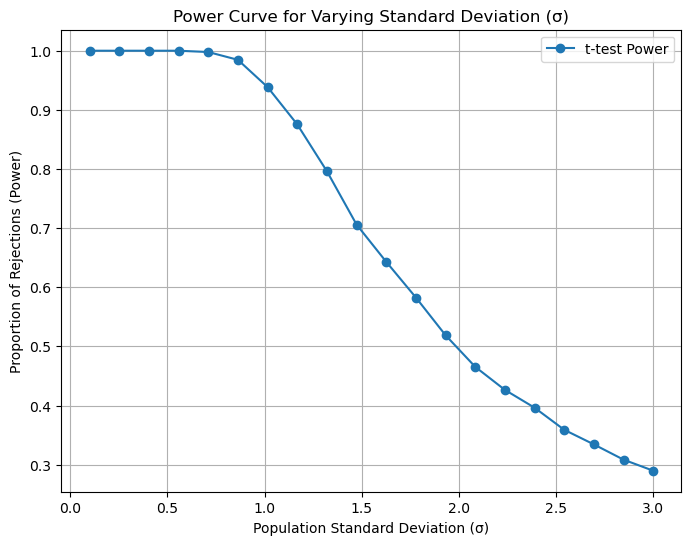

In [8]:
sigma_values = np.linspace(0.1, 3, 20)
power_values_sigma = [power_simulation(n, mu, sigma, alpha, N) for sigma in sigma_values]
plt.figure(figsize=(8, 6))
plt.plot(sigma_values, power_values_sigma, marker='o', label="t-test Power")
plt.xlabel("Population Standard Deviation (σ)")
plt.ylabel("Proportion of Rejections (Power)")
plt.title("Power Curve for Varying Standard Deviation (σ)")
plt.grid(True)
plt.legend()
plt.show()

As sigma increases, the power of the test decreases. This is because larger variance means the sample mean is less precise, which reduces the ability to detect significant effects.

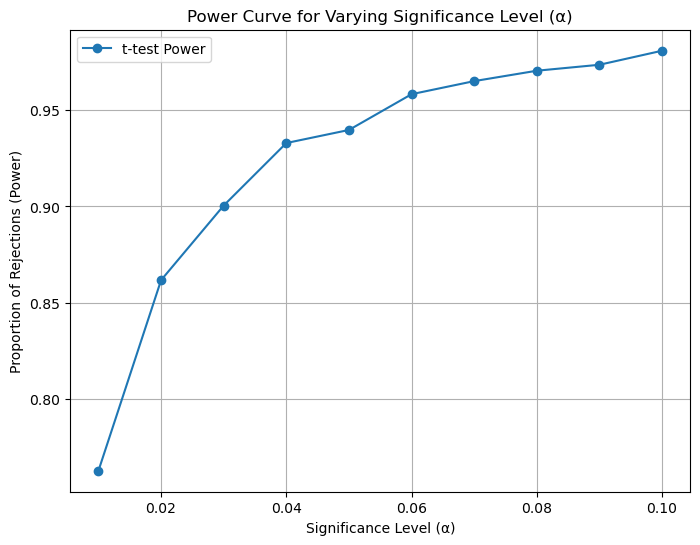

In [9]:
alpha_values = np.linspace(0.01, 0.1, 10)
power_values_alpha = [power_simulation(n, mu, sigma, alpha, N) for alpha in alpha_values]
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, power_values_alpha, marker='o', label="t-test Power")
plt.xlabel("Significance Level (α)")
plt.ylabel("Proportion of Rejections (Power)")
plt.title("Power Curve for Varying Significance Level (α)")
plt.grid(True)
plt.legend()
plt.show()

As alpha increases, the power of the test increases. This is because with a higher significance level, the rejection region of the test becomes larger, making it easier to reject the null hypothesis.

In [10]:
def z_test(n, mu, sigma, alpha):
    sample = np.random.normal(mu, sigma, size=n)
    sample_mean = np.mean(sample)
    z_stat = sample_mean / (sigma / np.sqrt(n))
    z_critical = stats.norm.ppf(1 - alpha)
    return z_stat > z_critical

In [11]:
def power_simulation_z(n, mu, sigma, alpha, N):
    rejections = 0
    for _ in range(N):
        if z_test(n, mu, sigma, alpha):
            rejections += 1
    return rejections / N

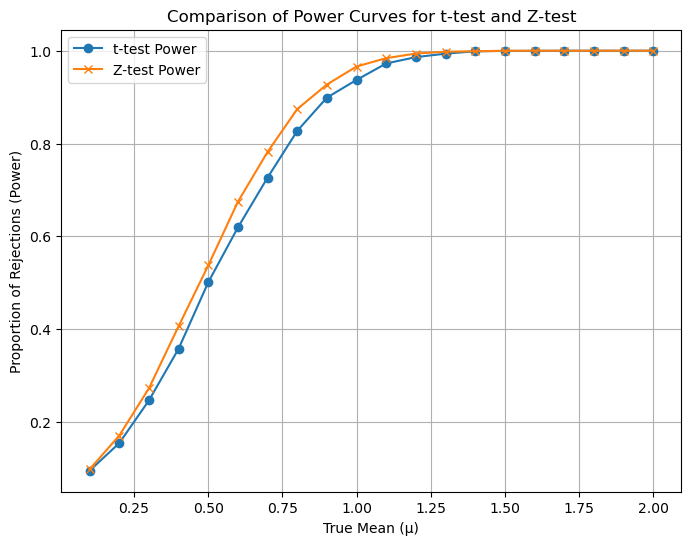

In [12]:
power_values_z = [power_simulation_z(n, mu, sigma, alpha, N) for mu in mu_values]
plt.figure(figsize=(8, 6))
plt.plot(mu_values, power_values, marker='o', label="t-test Power")
plt.plot(mu_values, power_values_z, marker='x', label="Z-test Power")
plt.xlabel("True Mean (μ)")
plt.ylabel("Proportion of Rejections (Power)")
plt.title("Comparison of Power Curves for t-test and Z-test")
plt.grid(True)
plt.legend()
plt.show()

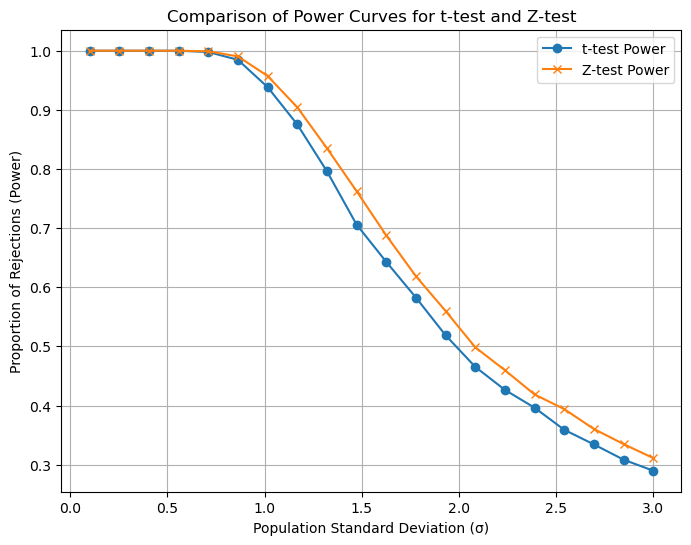

In [13]:
power_values_sigma_z = [power_simulation_z(n, mu, sigma, alpha, N) for sigma in sigma_values]
plt.figure(figsize=(8, 6))
plt.plot(sigma_values, power_values_sigma, marker='o', label="t-test Power")
plt.plot(sigma_values, power_values_sigma_z, marker='x', label="Z-test Power")
plt.xlabel("Population Standard Deviation (σ)")
plt.ylabel("Proportion of Rejections (Power)")
plt.title("Comparison of Power Curves for t-test and Z-test")
plt.grid(True)
plt.legend()
plt.show()

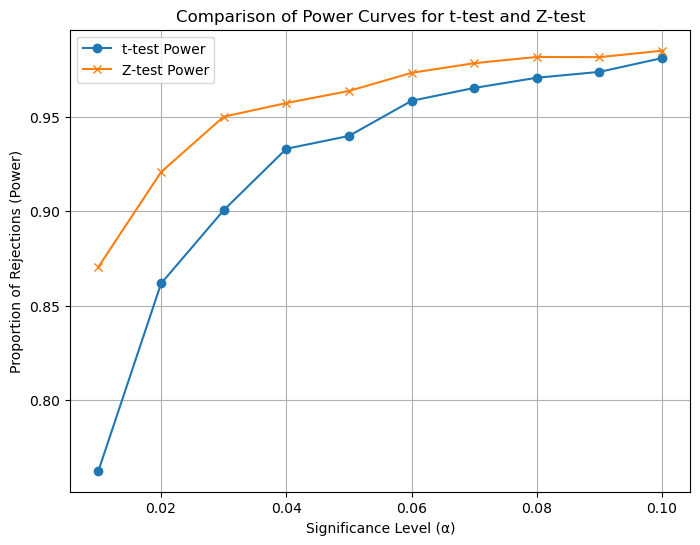

In [14]:
power_values_alpha_z = [power_simulation_z(n, mu, sigma, alpha, N) for alpha in alpha_values]
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, power_values_alpha, marker='o', label="t-test Power")
plt.plot(alpha_values, power_values_alpha_z, marker='x', label="Z-test Power")
plt.xlabel("Significance Level (α)")
plt.ylabel("Proportion of Rejections (Power)")
plt.title("Comparison of Power Curves for t-test and Z-test")
plt.grid(True)
plt.legend()
plt.show()

The power curve for the Z-test will be slightly steeper than the t-test, especially when
n is small, because the Z-test assumes known variance, which leads to a more precise estimate of the test statistic.